In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = [224, 224]

train_path = 'dataset/training_set'
valid_path = 'dataset/test_set'

In [6]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 12s 0us/step


In [7]:
# useful for getting number of classes
folders = glob('dataset/training_set/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  

In [13]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [19]:
  # fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))            

/home/adihtya/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
250/250 [==============================] - 2724s 11s/step - loss: 0.5281 - accuracy: 0.7901 - val_loss: 0.2115 - val_accuracy: 0.9135
Epoch 2/5
250/250 [==============================] - 3251s 13s/step - loss: 0.1861 - accuracy: 0.9185 - val_loss: 0.2046 - val_accuracy: 0.9125
Epoch 3/5
250/250 [==============================] - 2917s 12s/step - loss: 0.1509 - accuracy: 0.9389 - val_loss: 0.2869 - val_accuracy: 0.8995
Epoch 4/5
250/250 [==============================] - 2746s 11s/step - loss: 0.1661 - accuracy: 0.9365 - val_loss: 0.2163 - val_accuracy: 0.9210
Epoch 5/5
250/250 [==============================] - 2579s 10s/step - loss: 0.1632 - accuracy: 0.9351 - val_loss: 0.2043 - val_accuracy: 0.9280


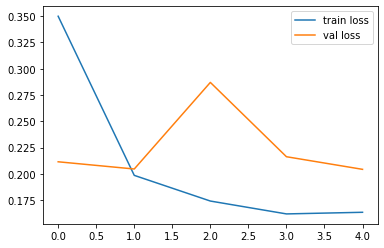

<Figure size 432x288 with 0 Axes>

In [20]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [25]:
# accuracies
plt.plot(r.history['accuracies'], label='train acc')
plt.plot(r.history['val_accuracies'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

KeyError: 'accuracies'

In [26]:
import tensorflow as tf

from tensorflow.keras.models import load_model

In [27]:
model.save('model.h5')

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1
